<a href="https://colab.research.google.com/github/christabs27/Linear-Regression-for-Heights/blob/main/11_10_2_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.10.2 Activity

##Breast Cancer Detection

###According to the American Cancer Society:

According to the <a href="https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html">American Cancer Society (n.d.)</a>, breast cancer is the second-most common type of cancer diagnosed in American women, behind only skin cancers. The average risk of a woman in the United States developing breast cancer sometime in her life is about 13%. This means there is a 1 in 8 chance that she will develop breast cancer.

Mammograms are used to detect breast cancer, hopefully at an early stage; however, many masses that appear on a mammogram are not actually cancerous. Developing a machine learning model to predict whether a tumor is benign or cancerous would be helpful for physicians as they guide and treat patients.

For this activity, you'll revisit the full dataset, which contains the mean, standard deviation (SD), and *worst* value of each tumor measurement.

There are a number of factors, and many of them are clearly related to one another. In this activity, youu will use principal component analysis (PCA) to transform this very large set of features into a much smaller set of principal components that still do a good job predicting which tumors are cancerous and which are benign.

#Step 1: Download and Save the `cancer_full.csv` Data Set from the Class Resources  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `cancer_full.csv` Data Set by Running the Following Code Block 

* When prompted, navigate to where you saved the `cancer_full.csv` data set on your computer. Select the file. 

In [1]:
#Step 2

from google.colab import files
cancer_full = files.upload()

Saving cancer_full.csv to cancer_full.csv


#Step 3: Import the necessary packages.
Import the following packages:
```
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import numpy as np
```

In [2]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import numpy as np



# Step 4: Prepare the Data 
* Run the following code block to complete all of the steps necessary to prepare the data for modeling.
* As a reminder, you'll be recasting the diagnosis as a numeric rather than character variable, splitting the data into the target vector and feature matrix, and then splitting the data into training and test sets.

In [3]:
#Step 4

cancer_full = pd.read_csv('cancer_full.csv')

cancer_full.loc[cancer_full['diagnosis'] == 'M', 'cancer_present'] = 1
cancer_full.loc[cancer_full['diagnosis'] == 'B', 'cancer_present'] = 0

y = cancer_full['cancer_present']
X = cancer_full.drop(['id','diagnosis','cancer_present'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#Step 5: Standardize the Data
* It is very important to standardize the quantitative features before using PCA. In earlier modules the cancer measurements were shown to be on very different scales.
* The training and test data sets will need to be standardized separately. You can standardize the training data with the following code: 

```
X_train_s = StandardScaler().fit_transform(X_train)
```

* In the code block below, standardize both `X_train` and `X_test`. Name the results `X_train_s` and `X_test_s`, respectively.

In [4]:
#Step 5
X_train_s = StandardScaler().fit_transform(X_train)


In [11]:
X_train_s = StandardScaler().fit_transform(X_train)

In [12]:
X_test_s =  StandardScaler().fit_transform(X_test)

#Step 6: Determine the Principal Components of the Data
* **Note:** You will use only the training data to determine the principal components. Once they are determined, you will use those results to transform both the training and test sets.
* Instantiate a PCA model that determines the principal components of the data. This model should keep the number of components that explain 95% of the variability in the data. You can use the code below to instantiate the model.

```
pca = PCA(.95)
```

* Fit and transform the data with the PCA model using the following code:

```

pca.fit(X_train_s)

X_train_components = pca.transform(X_train_s)

```

In [14]:
 pca = PCA(.95)

In [16]:
#Step 6
pca.fit(X_train_s)
X_train_components = pca.transform(X_train_s)


#Step 7: Graph the Proportion of the Variability Explained by the Principal Components
* `pca.explained_variance_ratio_` will return the proportion of the variability in the model that's explained by each of the principal components.
* **Note:** The results are sorted in order of importance of each component. Additional components explain smaller and smaller proportions of the variance.  
* Run the following code block to visualize how the principal components explain the model variability.
* The cutoff threshold is the value set when the PCA model was instantiated. The model was instructed to throw away any extra components once it had explained 95% of the variability in the outcome.

NameError: ignored

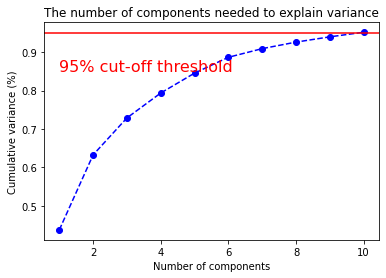

In [17]:
#Step 7

n_components = np.arange(1, 11, step=1)
exp_var = np.cumsum(pca.explained_variance_ratio_)


plt.plot(n_components, exp_var, marker='o', linestyle='--', color='b')
plt.ylabel('Cumulative variance (%)')
plt.xlabel('Number of components')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(1, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

axes = plt.gca()
ax.grid(axis='x')
plt.show()

#Step 8: Visualize the Proportion of the Variability Explained by the Principal Components When the Model Is Required to Explain 99% of the Variability
* Run the following code block to observe the number of components retained by the model when it is require to explain 99% of the variability in the outcome.
* How many more components will need to be included in the model to increase the variability explained from 95% to 99%?

NameError: ignored

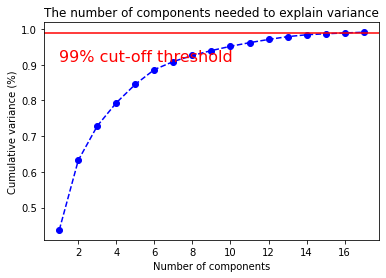

In [18]:
#Step 8

pca_99 = PCA(.99)
pca_99.fit(X_train_s)

X_train_components_99 = pca_99.transform(X_train_s)

n_components_99 = np.arange(1, 18, step=1)
exp_var_99 = np.cumsum(pca_99.explained_variance_ratio_)

exp_var_99

plt.plot(n_components_99, exp_var_99, marker='o', linestyle='--', color='b')
plt.ylabel('Cumulative variance (%)')
plt.xlabel('Number of components')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(1, 0.91, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


**Step 8 Answer**


#Step 9: Fit a Logistic Regression Model to the Transformed Training Data and Compute the Accuracy Using 10-fold Cross Validation (CV)
* Run the following code block to model the first 10 principal components using logistic regression. The code block will also compute the 10-fold CV. 
* What is the average accuracy?

In [19]:
#Step 9

log_reg = LogisticRegression()

log_reg.fit(X_train_components, y_train)

scores = cross_val_score(log_reg, X_train_components, y_train, cv=10)

print(scores.mean())


0.9647286821705426


**Step 9 Answer:**



#Step 10: Calculate the Model Accuracy Using the Test Set
* First transform the test data using the following code:

```
X_test_components = pca.transform(X_test_s)
```
* Recall that you are only transforming the test data based on the principal components that were fit using the training data.
* Calculate the model testing accuracy using the following code:

```
log_reg.score(X_test_components, y_test)
```

In [20]:
#Step 10
X_test_components = pca.transform(X_test_s)


In [21]:
log_reg.score(X_test_components, y_test)

0.9790209790209791